# STUDENTS PERFORMANCE IN EXAMS ANALYSIS

## Group 28

### 11/1/2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
stud_perf = pd.read_csv("StudentsPerformance.csv")
stud_perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
stud_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
stud_perf.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Total Number of Students by Gender

In [5]:
stud_perf["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

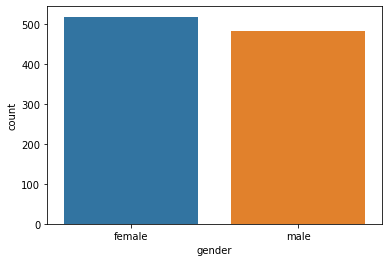

In [6]:
sns.countplot(x=stud_perf["gender"])

([<matplotlib.patches.Wedge at 0x16178bc3cd0>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'female'),
  Text(0.06217041096298411, -1.0982417038160106, 'male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '52%'),
  Text(0.033911133252536786, -0.5990409293541875, '48%')])

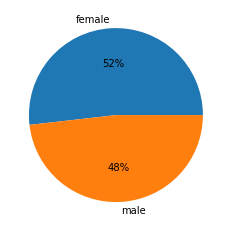

In [7]:
gender_names = stud_perf["gender"].value_counts().index
gender_value = stud_perf["gender"].value_counts().values
plt.pie(gender_value, labels=gender_names, autopct='%1.f%%')

`Females who sta for exams : 52%`
`Males who sat for exams : 48%`

# Lets Create a total column

In [8]:
score_columns = ["math score", "reading score", "writing score"]
stud_perf["total score"] = stud_perf[score_columns].sum(axis=1)
stud_perf

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


# Lets get the mean scores for Male and Female in each subject

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


<AxesSubplot:xlabel='gender'>

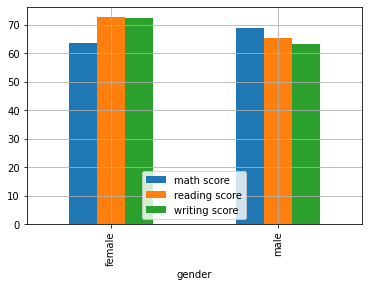

In [9]:
mean_scores=stud_perf.groupby('gender')[['math score','reading score','writing score']].mean()
print(mean_scores)
mean_scores.plot(kind='bar',grid=True )

`From the above results, the Male students had a higher testscore in Maths, while the Females students has a higher test score in Reading.`

# Lets get the Average score for each student.

In [10]:
stud_perf["average_score"] = round((stud_perf["math score"] + stud_perf["reading score"] + stud_perf["writing score"])/3)
stud_perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,73.0
1,female,group C,some college,standard,completed,69,90,88,247,82.0
2,female,group B,master's degree,standard,none,90,95,93,278,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.0
4,male,group C,some college,standard,none,76,78,75,229,76.0


# Lets find out the "ffectiveness of Parental Level Of Education" on Students performance in Exams

<AxesSubplot:xlabel='average_score', ylabel='parental level of education'>

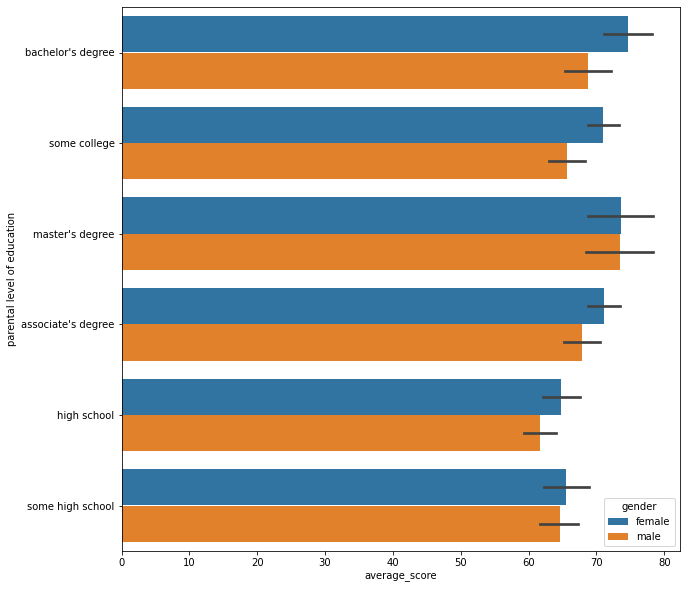

In [11]:
plt.figure(figsize=(10,10))
sns.barplot(x = stud_perf["average_score"], y = stud_perf["parental level of education"], hue = stud_perf["gender"])


`From the above analysis, its clear that parents level of education has no effect on the students performance in exams`
`We can see that Female students, whose parents had a Bachelors degree, out performed the female and male students whose parents are Masters degree holders`

# Lets find our the effectiveness of test preparation course on students performance

<Figure size 720x720 with 0 Axes>

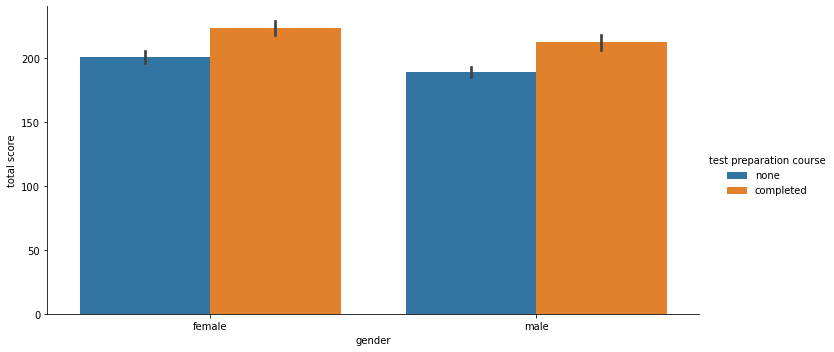

In [12]:
plt.figure(figsize=(10,10))
sns.catplot(x="gender", y="total score", hue="test preparation course", data=stud_perf, kind='bar', height=5, aspect=2)
plt.show()

`from the above results, its clear that Male and Female students who completed the Test Preparation course, had higher scores in Exams`
`However, Students who didnt complete the test preparation course had lower scores.`

# Lets find our the effectiveness of having adequate lunch on students performance in exams

<Figure size 720x720 with 0 Axes>

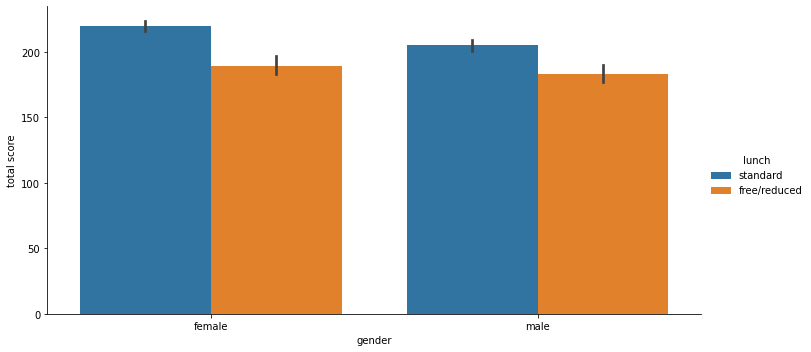

In [13]:
plt.figure(figsize=(10,10))
sns.catplot(x="gender", y="total score", hue="lunch", data=stud_perf, kind='bar', height=5, aspect=2)
plt.show()


`From the Above result we can see that standard and adeqaute lunch taken by students has a positive effect on their scores,
they performed significantly better than the students who had free/reduced lunch.` 

<AxesSubplot:xlabel='average_score', ylabel='parental level of education'>

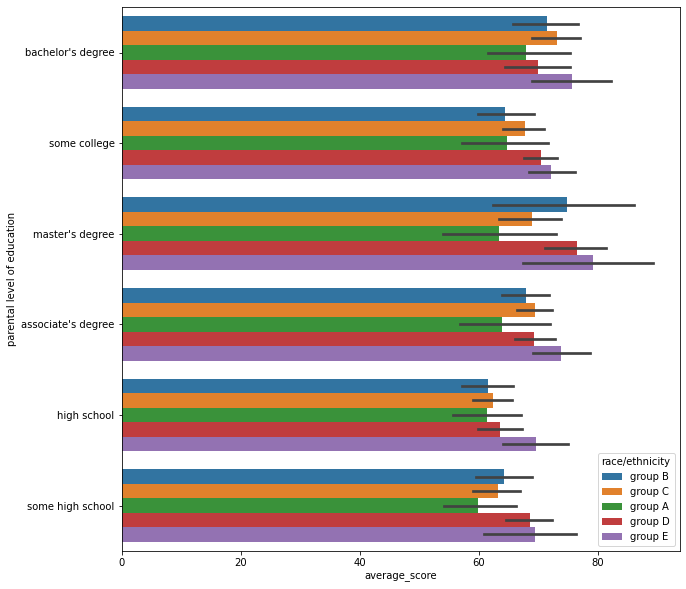

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(x = stud_perf["average_score"], y = stud_perf["parental level of education"], hue = stud_perf["race/ethnicity"])

In [15]:
stud_perf["test preparation course"] = stud_perf["test preparation course"].map({"none":0, "completed":1})

In [16]:
label_encoder = LabelEncoder()

stud_perf["gender"] = label_encoder.fit_transform(stud_perf["gender"])
stud_perf["race/ethnicity"] = label_encoder.fit_transform(stud_perf["race/ethnicity"])
stud_perf["lunch"] = label_encoder.fit_transform(stud_perf["lunch"])

stud_perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average_score
0,0,1,bachelor's degree,1,0,72,72,74,218,73.0
1,0,2,some college,1,1,69,90,88,247,82.0
2,0,1,master's degree,1,0,90,95,93,278,93.0
3,1,0,associate's degree,0,0,47,57,44,148,49.0
4,1,2,some college,1,0,76,78,75,229,76.0


In [17]:
stud_perf = pd.get_dummies(stud_perf, drop_first=True)
stud_perf.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total score,average_score,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,1,0,72,72,74,218,73.0,1,0,0,0,0
1,0,2,1,1,69,90,88,247,82.0,0,0,0,1,0
2,0,1,1,0,90,95,93,278,93.0,0,0,1,0,0
3,1,0,0,0,47,57,44,148,49.0,0,0,0,0,0
4,1,2,1,0,76,78,75,229,76.0,0,0,0,1,0


<AxesSubplot:>

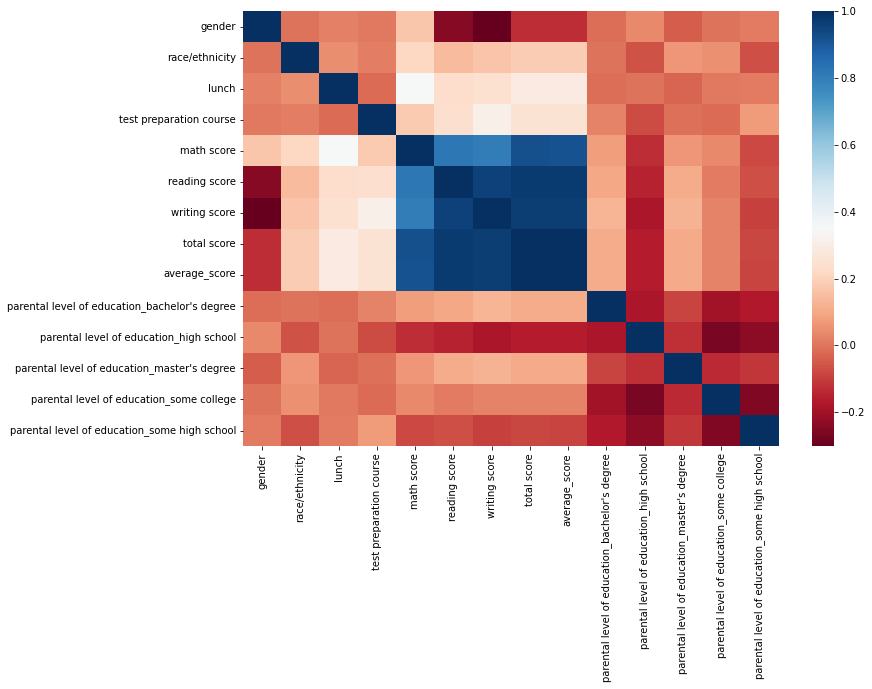

In [19]:
correlation = stud_perf.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation,cmap="RdBu",fmt="")

In [20]:
x = stud_perf.drop(stud_perf[["gender", "math score", "reading score", "writing score", "average_score"]], axis=1)
x.head()

,race/ethnicity,lunch,test preparation course,total score,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,1,1,0,218,1,0,0,0,0
1,2,1,1,247,0,0,0,1,0
2,1,1,0,278,0,0,1,0,0
3,0,0,0,148,0,0,0,0,0
4,2,1,0,229,0,0,0,1,0


In [22]:
y = stud_perf["average_score"]
y.head()

0    73.0
1    82.0
2    93.0
3    49.0
4    76.0
Name: average_score, dtype: float64

# Splitting the data set into Train and Test data sets


In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Viewing the shape of the data set

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 9)
(800,)
(200, 9)
(200,)


# Training the machine learning model

In [25]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)

LinearRegression()

In [26]:
linReg.score(X_test, y_test)

0.9996367223048573

# Conclusion

# After our analysis we were able to come to this conclusion:
<ol>
    <li> The test preparation course aswell as adequate standard lunch,positively affects the performance of students in exams. </li>
     <li> Students who take the preparation course and eat standard lunch will always perform well in exams, so this should be mandatory. </li>
     <li> The Effectiveness of Lunch and Test preparation course on students performance in exams is 100% positive. </li>

# CODE CONTRIBUTORS:

## Names

- MR KINGSLEY JOEL
- MISS ELIZABETH EPHRAIM
- MR AYODEJI MATHEW DEDE
- MR UMIN NGLAS
- MR DAMILARE SAMUEL